# Sales Trend Analysis using Python
### Abdulwahid
### 4/21/2022

## Import Libraries
The given libraries contain functions that are requirement to the project

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot

## Load Dataset
Using pandas library the dataset is read through the ***read_csv*** function and the ***head*** function is used to read the first five rows.

In [2]:
DataSet=pd.read_csv(r'C:\Users\DELL\Desktop\Scientific Programming\Dataset.csv')
DataSet.head(10)

,order_date,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,year
0,1/1/2011,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2.0,0.0,106.140,35.46,2011
1,1/1/2011,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",NaN,NaN,NaN,36.036,9.72,2011
2,1/1/2011,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4.0,0.0,29.640,8.17,2011
3,1/1/2011,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,NaN,NaN,-26.055,4.82,2011
4,1/1/2011,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5.0,0.1,37.770,4.70,2011
5,1/1/2011,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",NaN,2.0,NaN,15.342,1.80,2011
6,1/2/2011,TEC-OKI-10002750,Technology,Machines,"Okidata Inkjet, Wireless",314.0,NaN,0.0,3.120,24.10,2011
7,1/3/2011,OFF-AP-10000304,Office Supplies,Appliances,"Hoover Microwave, White",276.0,1.0,NaN,110.412,125.32,2011
8,1/3/2011,TEC-CO-10004182,Technology,Copiers,"Hewlett Wireless Fax, Laser",912.0,4.0,0.4,-319.464,107.10,2011
9,1/3/2011,FUR-NOV-10002791,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",NaN,NaN,0.0,253.320,81.26,2011


### Check for Data types
It is very important to get to know what data type does each column represent

In [3]:
DataSet.dtypes

order_date        object
product_id        object
category          object
sub_category      object
product_name      object
sales            float64
quantity         float64
discount         float64
profit           float64
shipping_cost    float64
year               int64
dtype: object

### Sum of Null Values
The ***isnull*** function detects the null values while the ***sum*** function adds up all null values corresponding to a column.

In [4]:
DataSet.isnull().sum()

order_date       0
product_id       0
category         0
sub_category     0
product_name     0
sales            5
quantity         5
discount         5
profit           0
shipping_cost    0
year             0
dtype: int64

### Eliminate Missing Values
The ***dropna*** function is used to delete rows with missing values and ***shape*** function determines the number of columns and rows

In [5]:
DataSet=DataSet.dropna()
DataSet.shape

(51281, 11)

### Sum of Null Values (Final check)
Now all columns do not contain any missing values

In [6]:
DataSet.isnull().sum()

order_date       0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
shipping_cost    0
year             0
dtype: int64

### Dataset Preview
The ***head*** function is used to read the first five rows. But with 10 defined, the dataset will show first **10 rows**.

In [7]:
DataSet.head(10)

,order_date,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,year
0,1/1/2011,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2.0,0.00,106.1400,35.46,2011
2,1/1/2011,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4.0,0.00,29.6400,8.17,2011
4,1/1/2011,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5.0,0.10,37.7700,4.70,2011
8,1/3/2011,TEC-CO-10004182,Technology,Copiers,"Hewlett Wireless Fax, Laser",912.0,4.0,0.40,-319.4640,107.10,2011
11,1/3/2011,FUR-TA-10002797,Furniture,Tables,"Chromcraft Round Table, Adjustable Height",211.0,1.0,0.55,-70.3995,21.32,2011
12,1/3/2011,FUR-BO-10000728,Furniture,Bookcases,"Dania Corner Shelving, Traditional",854.0,7.0,0.00,290.4300,12.56,2011
14,1/3/2011,FUR-CH-10000214,Furniture,Chairs,"Hon Rocking Chair, Set of Two",159.0,2.0,0.40,-95.6760,10.07,2011
15,1/3/2011,TEC-PH-10002647,Technology,Phones,"Nokia Headset, VoIP",195.0,4.0,0.00,44.8800,8.43,2011
16,1/3/2011,OFF-BRE-10003081,Office Supplies,Appliances,"Breville Coffee Grinder, Black",123.0,2.0,0.00,42.9000,8.41,2011
18,1/3/2011,FUR-CH-10000666,Furniture,Chairs,"SAFCO Chairmat, Black",69.0,2.0,0.40,-26.4120,8.17,2011


## 1. Display the overall sales trend
The sales and year column are grouped and a quick sume of all sales in each year are shown.

In [8]:
DataSet.groupby('year')['sales'].sum()

year
2011    2257434.0
2012    2677493.0
2013    3405860.0
2014    4300041.0
Name: sales, dtype: float64

### Trend plot
This plot is used to show the trend of how sales change over the years. **It is observed that the sales increase exponentially over the years.**

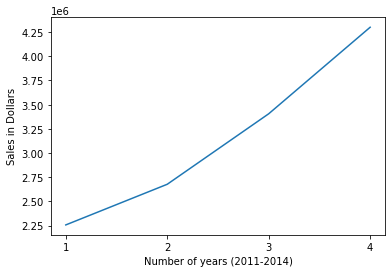

In [9]:
Yr=range(1,5)
plt.plot(Yr, DataSet.groupby('year')['sales'].sum())
plt.xticks(Yr)
plt.ylabel('Sales in Dollars')
plt.xlabel('Number of years (2011-2014)')
plt.show()

## 2. Display the Top 10 products by sales
### Bar plot
The barchart is constructed based onthe product name and maximum number of sales are grouped in a descending order.
**The results show the first ten most selling products.**

<AxesSubplot:xlabel='product_name'>

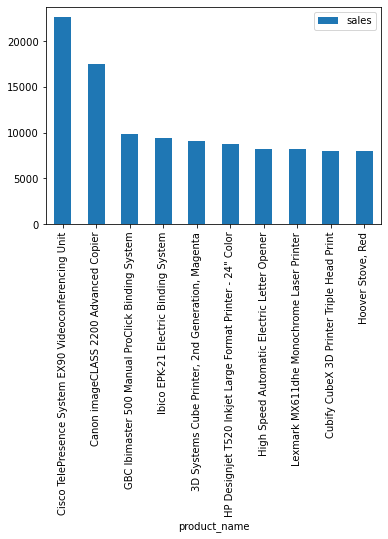

In [24]:
DataSet.groupby('product_name').agg({'sales': 'max'}).sort_values(by='sales', ascending=False).iloc[:10].plot(kind='bar')

### New Column (Sales_max)
The new column is created by grouping by the product name and sales.

In [25]:
DataSet['Sales_Max'] = DataSet.groupby(['product_name'])['sales'].transform(max)
DataSet

,order_date,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,year,Sales_Max
0,1/1/2011,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2.0,0.00,106.1400,35.46,2011,1429.0
2,1/1/2011,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4.0,0.00,29.6400,8.17,2011,116.0
4,1/1/2011,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5.0,0.10,37.7700,4.70,2011,159.0
8,1/3/2011,TEC-CO-10004182,Technology,Copiers,"Hewlett Wireless Fax, Laser",912.0,4.0,0.40,-319.4640,107.10,2011,4448.0
11,1/3/2011,FUR-TA-10002797,Furniture,Tables,"Chromcraft Round Table, Adjustable Height",211.0,1.0,0.55,-70.3995,21.32,2011,1877.0
...,...,...,...,...,...,...,...,...,...,...,...,...
51285,12/31/2014,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14.0,2.0,0.20,4.5188,0.89,2014,49.0
51286,12/31/2014,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4.0,1.0,0.00,0.4200,0.49,2014,56.0
51287,12/31/2014,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.0,3.0,0.00,12.3600,0.35,2014,79.0
51288,12/31/2014,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.0,1.0,0.00,0.5600,0.20,2014,107.0


### Drop Duplicates
The duplicates are removed incase the will affect the results. ***drop_duplicates*** function is used to eliminate the duplicates.

In [26]:
df2 = DataSet.drop_duplicates(['Sales_Max']).nlargest(10, 'Sales_Max')[['product_name', 'Sales_Max']]
df2

,product_name,Sales_Max
1103,Cisco TelePresence System EX90 Videoconferenci...,22638.0
23575,Canon imageCLASS 2200 Advanced Copier,17500.0
12947,GBC Ibimaster 500 Manual ProClick Binding System,9893.0
5522,Ibico EPK-21 Electric Binding System,9450.0
22483,"3D Systems Cube Printer, 2nd Generation, Magenta",9100.0
5359,HP Designjet T520 Inkjet Large Format Printer ...,8750.0
3764,High Speed Automatic Electric Letter Opener,8188.0
4965,Lexmark MX611dhe Monochrome Laser Printer,8160.0
47195,Cubify CubeX 3D Printer Triple Head Print,8000.0
1024,"Hoover Stove, Red",7959.0


## 3. Find the Most Selling Products
The barplot designed by grouping by the product name and quantity while showing only the first five products.

<AxesSubplot:xlabel='product_name'>

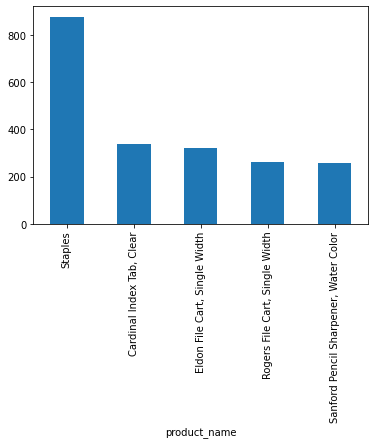

In [27]:
DataSet.groupby('product_name')['quantity'].sum().nlargest(5).plot(kind='bar')